In [1104]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

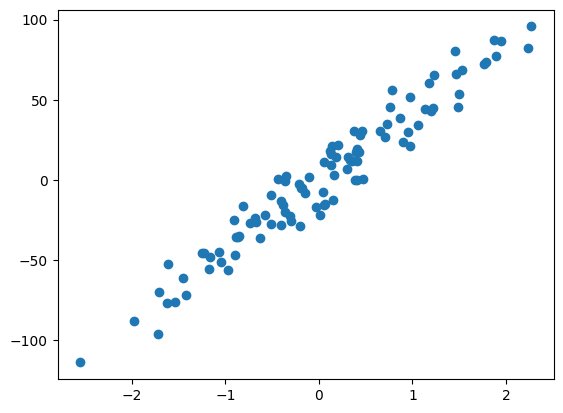

In [1105]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée

Important: vérifier les dimensions de x et y. On remarque que y n'a pas les dimensions (100, 1). On corrige le probleme avec np.reshape

In [1106]:
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)

print(y.shape)

(100, 1)
(100,)
(100, 1)


Création de la matrice X qui contient la colonne de Biais. Pour ca, on colle l'un contre l'autre le vecteur x et un vecteur 1 (avec np.ones) de dimension égale a celle de x

In [1107]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(100, 2)


Finalement, création d'un vecteur parametre $\theta$, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (2, 1). Si on désire toujours reproduire le meme vecteur $\theta$, on utilise comme avant np.random.seed(0).

In [1108]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

# 2. Modele Linéaire
On implémente un modele $F = X.\theta$, puis on teste le modele pour voir s'il n'y a pas de bug (bonne pratique oblige). En plus, cela permet de voir a quoi ressemble le modele initial, défini par la valeur de $\theta$

In [1109]:
def model(X, theta):
    return X.dot(theta)

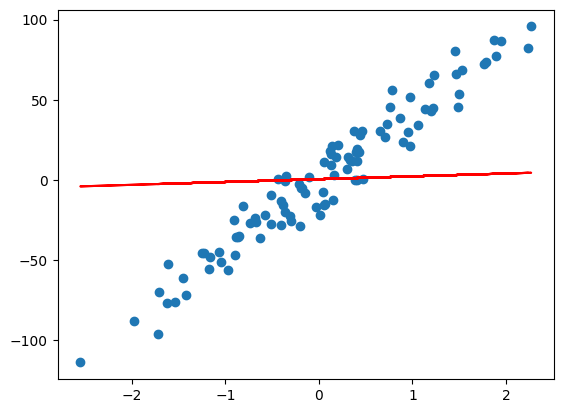

In [1110]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

# 3. Fonction Cout :  Erreur Quadratique moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne,  **Mean Squared Error (MSE)** en anglais.

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [1111]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [1112]:
cost_function(X, y, theta)

np.float64(905.6306841935502)

# 4. Gradients et Descente de Gradient
On implémente la formule du gradient pour la **MSE**

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Ensuite on utilise cette fonction dans la descente de gradient:

$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$


In [1113]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [1114]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

# 5. Phase d'entrainement
On définit un **nombre d'itérations**, ainsi qu'un **pas d'apprentissage $\alpha$**, et c'est partit !

Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [1115]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [1116]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[42.61765864],
       [-0.81309274]])

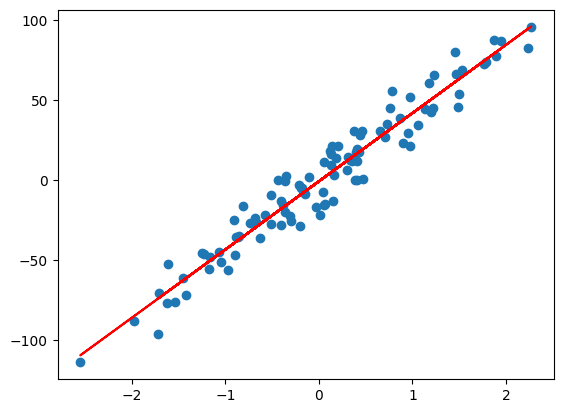

In [1117]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

# 6. Courbes d'apprentissage
Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas **learning_rate** est peut-etre trop élevé, il faut prendre un pas plus faible.

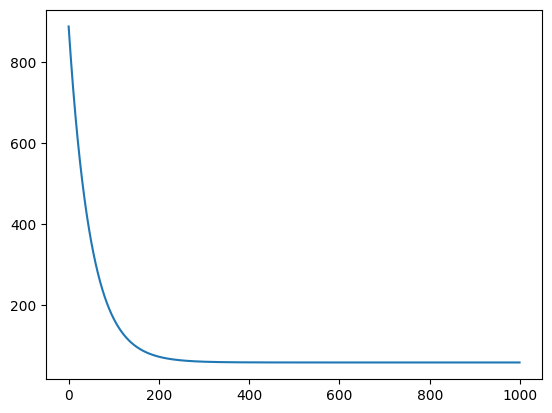

In [1118]:
plt.plot(range(n_iterations), cost_history)

# 7. Evaluation finale
Pour évaluer la réelle performance de notre modele avec une métrique populaire (pour votre patron, client, ou vos collegues) on peut utiliser le **coefficient de détermination**, aussi connu sous le nom $R^2$. Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modele

In [1119]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [1120]:
coef_determination(y, predictions)

np.float64(0.9417294706504984)

# 8. Moindre Carre

On implémente la formule du **Moindre Carre**

$\theta_m =  (X^T.X)^{-1}.(X^T.Y)$ 


In [1121]:

def theta_m(X, y): 
    return  np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

In [1122]:
theta_final = theta_m(X, y)
theta_final

array([[42.61943029],
       [-0.81418183]])

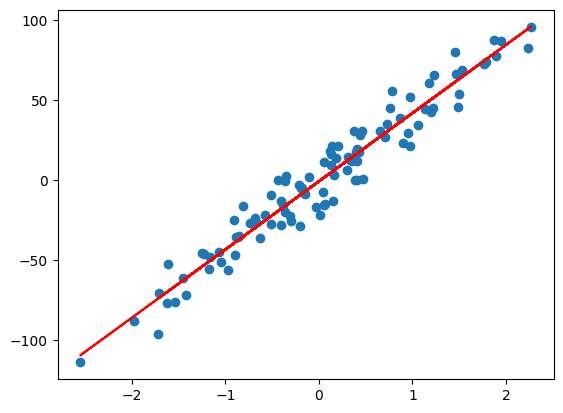

In [1123]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

In [1124]:
coef_determination(y, predictions)

np.float64(0.9417294727711081)

# 9. Régression Polynomiale

Pour créer la matrice \( X \) contenant la colonne de biais, nous construisons une matrice qui représente les puissances de \( x \), allant de \( x^n \) jusqu'à une colonne de 1. Cela consiste à concaténer les colonnes de \( x \) (élevé à différentes puissances) avec une colonne de biais constituée de 1 (créée avec `np.ones`) de la même dimension que \( x \).

In [1126]:
class PolynomialeRegression:
    def __init__(self, x, y, n=2, learning_rate=0.01, n_iterations=200):
        np.random.seed(0)  # Initialiser la graine pour des résultats reproductibles
        self.n = n
        self.x = x
        self.y = y
        self.X = self._build_design_matrix()  # Générer la matrice des puissances de x
        self.theta = np.random.randn(self.X.shape[1], 1)  # Initialiser les coefficients aléatoirement
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.cost_history = np.zeros(n_iterations)  # Stockage pour suivre l'évolution du coût

    def _build_design_matrix(self):
        """Construit la matrice de conception X avec des puissances de x et un terme de biais."""
        X = [self.x**i for i in range(self.n, 0, -1)]  # Colonnes de x^n à x^1
        X.append(np.ones((self.x.shape[0], 1)))  # Ajouter une colonne de 1 pour le terme constant
        return np.hstack(X)

    def model(self):
        """Calcule les prédictions du modèle pour les valeurs de x."""
        return self.X.dot(self.theta)

    def cost_function(self):
        """Calcule le coût (erreur quadratique moyenne) pour les paramètres actuels."""
        m = len(self.y)
        return 1/(2 * m) * np.sum((self.model() - self.y) ** 2)

    def grad(self):
        """Calcule le gradient pour la descente de gradient."""
        m = len(self.y)
        return 1/m * self.X.T.dot(self.model() - self.y)

    def fit(self):
        """Entraîne le modèle en utilisant la descente de gradient."""
        for i in range(self.n_iterations):
            self.theta -= self.learning_rate * self.grad()  # Mise à jour des paramètres
            self.cost_history[i] = self.cost_function()  # Enregistrer le coût pour chaque itération

    def predict(self, x):
        """Prédit les valeurs de y pour de nouvelles entrées x."""
        X_pred = [x**i for i in range(self.n, 0, -1)]
        X_pred.append(np.ones((x.shape[0], 1)))
        X_pred = np.hstack(X_pred)
        return X_pred.dot(self.theta)

    def coef_determination(self):
        """Calcule le coefficient de détermination R^2 pour les prédictions du modèle."""
        y_pred = self.model()
        u = ((self.y - y_pred) ** 2).sum()
        v = ((self.y - self.y.mean()) ** 2).sum()
        return 1 - u / v


In [1127]:
y = y + y**2
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Créer et entraîner le modèle
model = PolynomialeRegression(x, y, n=3, learning_rate=0.01, n_iterations=1000)
model.fit()

# Prédire et évaluer le modèle
y_pred = model.predict(x)
r2_score = model.coef_determination()

print("Coefficient de détermination (R^2) :", r2_score)

Coefficient de détermination (R^2) : 0.8983546165136146


In [1128]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y, y_pred=y_pred)

np.float64(654365.1932909804)

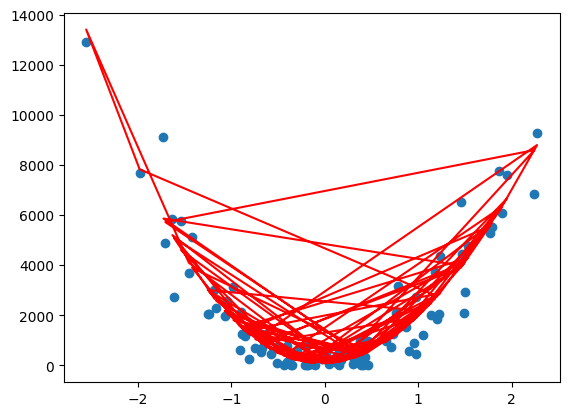

In [ ]:
# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, y_pred, c='r')

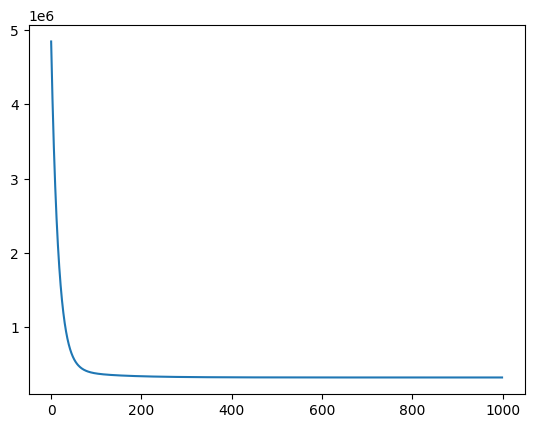

In [1130]:
plt.plot(range(model.n_iterations), model.cost_history)

# 9.1. Utilisant `Sckit-learn`

In [1131]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_feat = poly.fit_transform(x) 

In [1132]:
from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_feat, y)

LinearRegression()

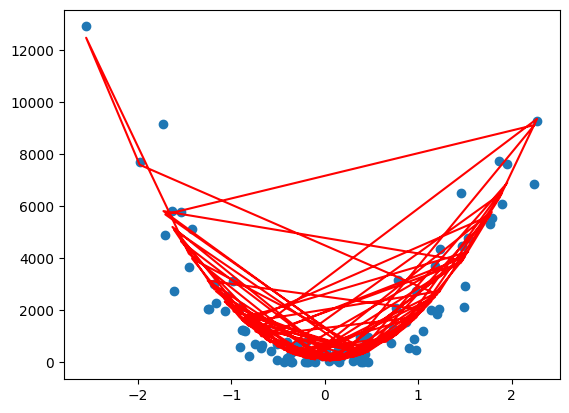

In [1133]:
y_predicted = poly_reg_model.predict(poly_feat)

plt.scatter(x, y)
plt.plot(x, y_predicted, c='r')

In [1134]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y, y_pred=y_predicted)

np.float64(682705.1599500561)

# 10. Deux dimension

X avec le taille de `(n, 2)` et y de `(n, 1)`

In [1135]:
from mpl_toolkits.mplot3d import Axes3D

In [1136]:
# Generate regression data with two features
X, y = make_regression(n_samples=100, n_features=2, noise=10)

# Unpack X into x_1 and x_2
# x_1, x_2 = X[:, 0], X[:, 1]

Text(0.5, 0.92, '3D Scatter Plot of Regression Data')

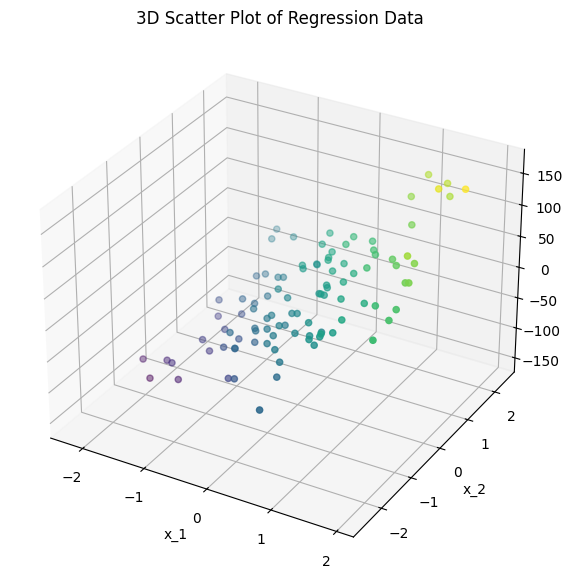

In [1137]:
# Plotting in 3D
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of x_1, x_2, and y
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='viridis', marker='o')

# Labels and title
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')
ax.set_title('3D Scatter Plot of Regression Data')

In [ ]:
model = PolynomialeRegression(x=X, y=y.reshape(-1, 1), n=1)


In [1139]:
model.theta

array([[1.76405235],
       [0.40015721],
       [0.97873798]])

In [1140]:
model.fit()
y_pred = model.predict(X)

In [ ]:

y

array([ -17.06297804,   73.66953036, -137.14637564,  -63.91682812,
        -22.40888461,   34.87344548,   38.62498111,   26.11859854,
         -4.09308792,   -4.91885039,    6.02138977,  -18.25260829,
        -23.26803806,  164.62872912,  -73.22773762,  106.44061014,
         66.95730419,   23.96917376,   -4.93709863,  125.16457456,
         88.07067061, -116.32776456,  132.51844493, -106.65457222,
        -42.63808846,  -22.22525342,   -5.89597871,  -22.7709257 ,
        111.849932  ,  -93.72781676,   57.65234127,   39.72568189,
         28.00051261,  -59.80611588,   16.90947252,   68.34948789,
        -97.86499916,   -3.61736853,   33.45497996,  -23.82468841,
         37.67765962,  -69.31804149, -128.22015937,   34.43823349,
        -19.06454949,   65.65373812,  -82.67017398,   70.85392839,
        -40.03120196,   23.53415372,   23.9552765 ,   97.06734029,
        -49.04060357,  -45.92917374,   58.95439452, -150.72696587,
        -70.55058813,   68.85314369,   14.18263523,  151.94078

In [1149]:

y_pred.reshape(1, -1)[0]

array([ -18.13697219,   69.88108201, -127.76999364,  -50.64591185,
         -9.41013005,   26.47990347,   34.63678395,   24.45133312,
          0.37440759,   -1.91933389,    9.47194353,  -19.1956024 ,
        -14.21135062,  135.39828218,  -44.77187151,   92.10089536,
         56.63416482,   19.50492887,   -0.51953824,  125.44500928,
         76.16111187, -106.90546071,  124.28225513, -102.4824582 ,
        -50.14563939,  -24.2153932 ,   -6.9853144 ,  -14.46796001,
         94.91949119,  -64.63134324,   40.99058847,   39.14225691,
         18.02609339,  -50.22993519,   17.24009389,   56.14092511,
        -71.53638891,  -14.49917181,   22.30479893,  -23.87429179,
         26.92507432,  -47.10391036,  -97.39438203,   35.15626752,
        -18.89596383,   60.64734947,  -58.86458465,   63.74135326,
        -54.11958132,   27.43483312,   24.94313037,   83.93735012,
        -43.95078051,  -33.95813959,   47.72011557, -121.70846896,
        -59.55927522,   62.76535903,   18.35831637,  114.92011

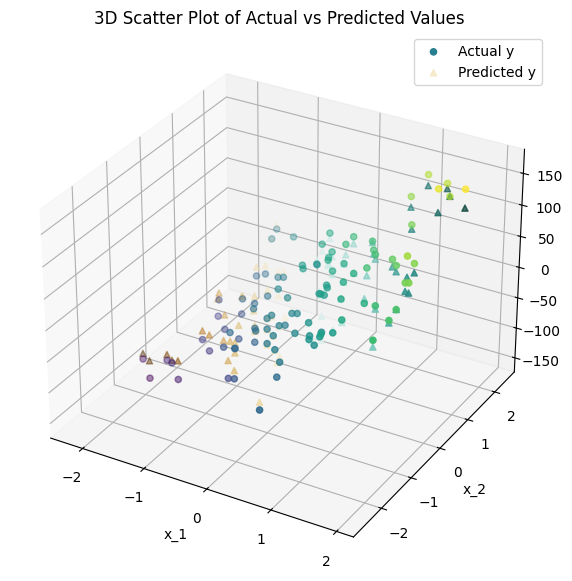

In [ ]:

# Plotting in 3D
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual y values
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='viridis', marker='o', label='Actual y')

# Scatter plot for predicted y values
ax.scatter(X[:, 0], X[:, 1], y_pred.reshape(1, -1)[0],  c=y_pred.reshape(1, -1)[0], cmap='BrBG', marker='^', label='Predicted y')

# Labels and title
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')
ax.set_title('3D Scatter Plot of Actual vs Predicted Values')
ax.legend()

plt.show()